In [10]:
import networkx as nx
from random import choices
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def kernel_density_estimation(cut, rest):

    cut_min_v = np.min(cut)
    cut_max_v = np.max(cut)
    cut_axis = np.linspace(cut_min_v, cut_max_v, 10000)
    
    rest_min_v = np.min(rest)
    rest_max_v = np.max(rest)
    rest_axis = np.linspace(rest_min_v, rest_max_v, 10000)
    
    kernel_for_cut = stats.gaussian_kde(cut, "silverman")
    kernel_for_rest = stats.gaussian_kde(rest, "silverman")
    
    cut_est_dist = kernel_for_cut.evaluate(cut_axis)
    rest_est_dist = kernel_for_rest.evaluate(rest_axis)
    
    return cut_est_dist, rest_est_dist

In [2]:
def BCC_score(G, dict_ebs, left_users, right_users):
    
    cut_ebs, rest_ebs = [], []
    BCC_estimates = []
    
    for n1 in left_users:
        for n2 in right_users:
            
            if G.has_edge(n1, n2):
                
                if ((n1, n2) in dict_ebs):
                    cut_ebs.append(dict_ebs[(n1, n2)])
                    #del dict_ebs[(n1, n2)]
                    
                else:
                    cut_ebs.append(dict_ebs[(n2, n1)])
                    #del dict_ebs[(n2, n1)]      
                    
    rest_ebs = list(dict_ebs.values())
    
    #cut_dist_kde, rest_dist_kde = kernel_density_estimation(cut_ebs, rest_ebs)
    #print(stats.entropy(rest_dist_kde, cut_dist_kde))

    # Let us sample from the distributions
    
    for _ in range(1000):
        #cut_dist = choices(cut_dist_kde, k=10000)
        #rest_dist = choices(rest_dist_kde, k=10000)
        
        cut_dist = choices(cut_ebs, k=10000)
        rest_dist = choices(rest_ebs, k=10000)

        kl_divergence = stats.entropy(rest_dist, cut_dist)
        BCC = 1-2.71828**(-kl_divergence)
        BCC_estimates.append(BCC)
                
    return BCC_estimates

In [3]:
def visualize_BCC(scores):
    
    #Binning
    weights = np.ones_like(scores)/float(len(scores))
    
    #Plotting
    fig, ax = plt.subplots(1,1)
    
    ax.hist(scores, weights = weights, bins = 20, color = "coral")
    ax.text(0.5, 1.05, "#" + ht, ha='center', va='center', transform=ax.transAxes)
    ax.text(0.85, 0.8, "μ = " + str(round(np.mean(scores), 2)), ha='center', va='center', transform=ax.transAxes)
    ax.text(0.85, 0.7, "σ = " + str(round(np.std(scores), 2)), ha='center', va='center', transform=ax.transAxes)
    
    #Save the figure
    fig.savefig("bcc_plots/" + ht + ".png", dpi=200, bbox_inches='tight')

In [6]:
ht_list = ["jotainrajaa", "maahanmuutto", "sote", "ilmastonmuutos", "vihreät", "perussuomalaiset", "kokoomus"]

Name: 
Type: Graph
Number of nodes: 749
Number of edges: 2091
Average degree:   5.5834
For jotainrajaa the average bcc was.  0.6392329584633396
jotainrajaa is completed.
Name: 
Type: Graph
Number of nodes: 1686
Number of edges: 3457
Average degree:   4.1008
For maahanmuutto the average bcc was.  0.7723302150121194
maahanmuutto is completed.
Name: 
Type: Graph
Number of nodes: 7792
Number of edges: 20919
Average degree:   5.3694
For sote the average bcc was.  0.606718568207821
sote is completed.
Name: 
Type: Graph
Number of nodes: 15699
Number of edges: 51558
Average degree:   6.5683
For ilmastonmuutos the average bcc was.  0.7064605771569618
ilmastonmuutos is completed.
Name: 
Type: Graph
Number of nodes: 2277
Number of edges: 4798
Average degree:   4.2143
For vihreät the average bcc was.  0.7103550367479506
vihreät is completed.
Name: 
Type: Graph
Number of nodes: 1162
Number of edges: 2910
Average degree:   5.0086
For perussuomalaiset the average bcc was.  0.8472621315412899
perussuo

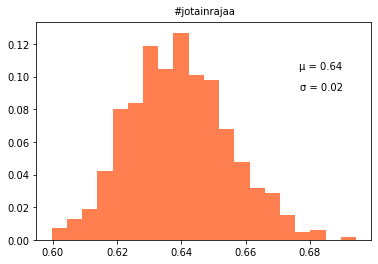

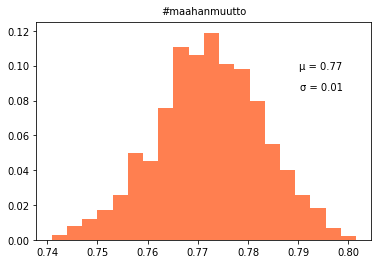

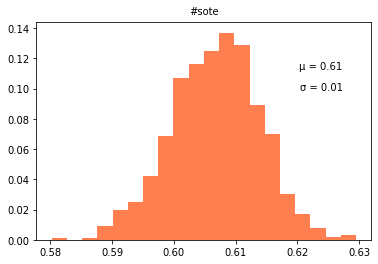

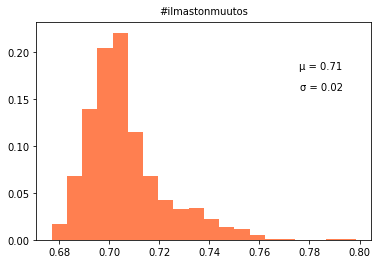

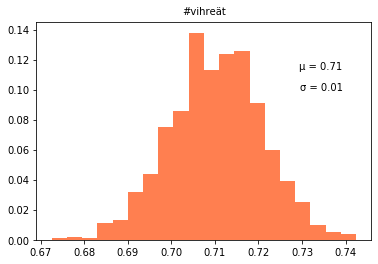

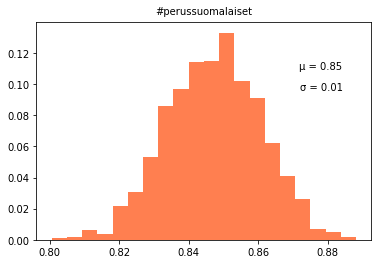

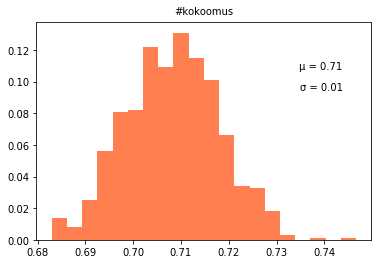

In [11]:
for ht in ht_list:
    
    G = nx.read_gml(ht + "/" + ht +"_retweet_network_giant.gml")
    print(nx.info(G))

    left_partition_users, right_partition_users = [], []

    with open(ht + "/" + ht + "_community1.txt") as f1:
        lines = f1.readlines()

    for line in lines:
        line = line.strip()
        left_partition_users.append(line)


    with open(ht + "/" + ht + "_community2.txt") as f2:
        lines = f2.readlines()

    for line in lines:
        line = line.strip()
        right_partition_users.append(line)
    
    dict_edgebetweenness = nx.edge_betweenness_centrality(G)
    bcc_scores = BCC_score(G, dict_edgebetweenness, left_partition_users, right_partition_users)
    print("For "+ht+" the average bcc was. ", np.mean(bcc_scores))
    visualize_BCC(bcc_scores)
    print(ht + " is completed.")

In [ ]:
########## THE SCRIPT ENDS HERE ############

In [ ]:
# Select the hashtag
ht = "maahanmuutto"

In [ ]:
G = nx.read_gml(ht + "/" + ht +"_retweet_network_giant.gml")
print(nx.info(G))

left_partition_users, right_partition_users = [], []

with open(ht + "/" + ht + "_community1.txt") as f1:
    lines = f1.readlines()

for line in lines:
    line = line.strip()
    left_partition_users.append(line)
    

with open(ht + "/" + ht + "_community2.txt") as f2:
    lines = f2.readlines()

for line in lines:
    line = line.strip()
    right_partition_users.append(line)

In [ ]:
dict_edgebetweenness = nx.edge_betweenness_centrality(G)

In [ ]:
bcc_scores = BCC_score(G, dict_edgebetweenness, left_partition_users, right_partition_users)
print("For "+ht+" the average bcc was. ", np.mean(bcc_scores))

In [ ]:
visualize_BCC(bcc_scores)